In [1]:
import PIL.Image
import numpy as np
from keras.models import load_model
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt

In [2]:
model = load_model('Модели на тест\\third_500.h5')
global model

In [3]:
def _preprocessing_image(image, model):
    image = PIL.Image.open(image)
    image = image.resize((256, 256))
    arr = np.array(image)
    arr = arr.reshape(1, 256, 256, 3)
    predictions = model.predict(arr)
    return arr, predictions

In [4]:
def bounding_box(img):
    img, prediction = _preprocessing_image(img,model)
    for i, pred in enumerate(img):
        x, y, w, h = prediction[i]
        print(x, y, w, h)
        b,g,r=cv2.split(pred)
        pred=cv2.merge((r,g,b)) 
        cv2.rectangle(pred, (int(x), int(y)), (int(w), int(h)), (0,255,0), 1) #Отрисовка рамки
        plt.figure(figsize=(5,5))
        plt.imshow(pred[:,:,::-1])

95.0222 82.66266 169.12363 163.03654


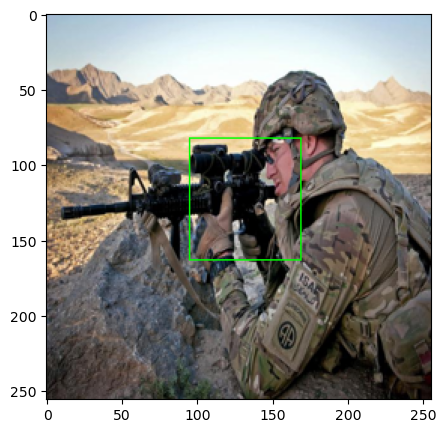

In [6]:
bounding_box('dataset\\data\\test\\images\\01faa5a31d794adf6_jpg.rf.8cdbf0567eb9b1954958e4429d3dddaa.jpg')

66.354805 64.60977 160.0123 162.7403


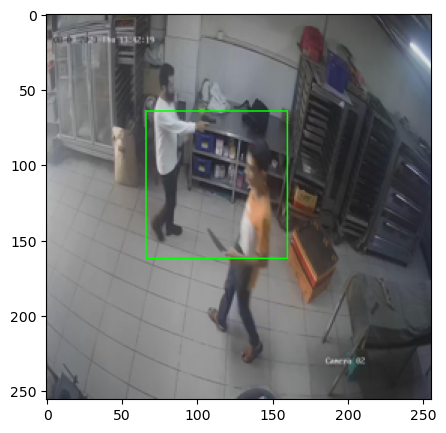

In [7]:
bounding_box('dataset\\data\\test\\images\\4a78bf4c-BDGK_C2_258_jpg.rf.f619f4d6082387c78faf2b7d87dfbc3d.jpg')

69.235886 88.293015 160.86043 183.89682


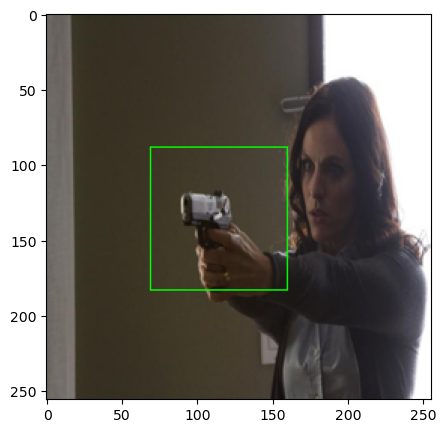

In [12]:
bounding_box('dataset\\data\\test\\images\\49b1fd053c5bfa17_jpg.rf.510b631bce3a8cb4874be39b7721fdcd.jpg')

47.873676 46.251415 188.86984 188.2757


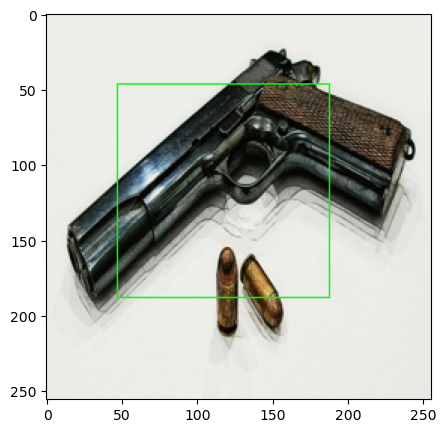

In [13]:
bounding_box('dataset\\data\\test\\images\\74a0a352a44cca78_jpg.rf.4ad64a7e485546f5b78e1296f4f54d6b.jpg')

91.51985 67.42982 178.0033 159.48187


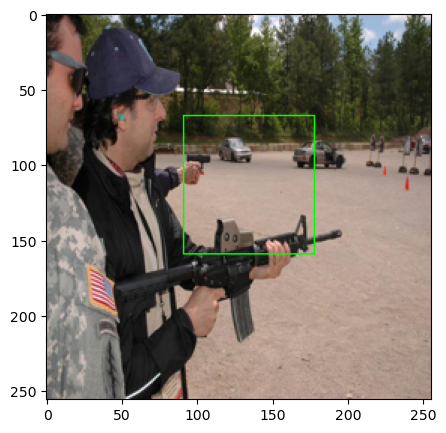

In [14]:
bounding_box('dataset\\data\\test\\images\\0181c8b9f8a8a32ff_jpg.rf.906c4da35027334dbe1509e918140a9c.jpg')